<a href="https://colab.research.google.com/github/nabdeep-patel/handwritten-digit-recognition/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST Dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. This dataset is considered to be the "hello world" dataset for Computer Vision. <br> <br>

### Import the required Libraries

In [3]:
pip install tensorflow

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [9]:
from tensorflow.python.keras.utils import np_utils

### Load the MNIST dataset

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


We load the dataset and verify the dimensions of the training and testing sets.

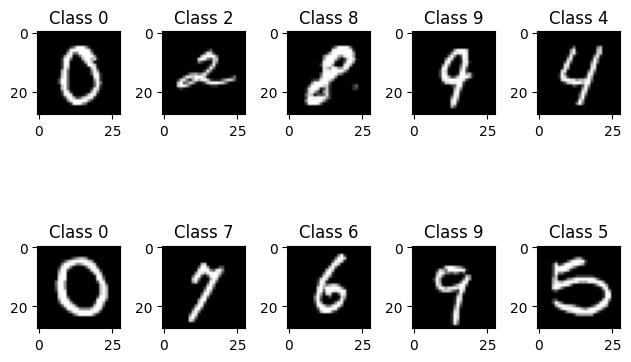

In [11]:
for i in range(10):
    plt.subplot(2,5,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

Here we are randomly selecting 10 images from the dataset and plotting them to get an idea of the handwritten digits and their respective classes.

In [12]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We use the reshape function to reshape 28 x 28 matrices into 784-length vectors, and convert the data type from Integer to 32-bit floating point numbers. Then we normalize the vectors by dividing each pixel value by 255.

In [13]:
no_classes = 10

Y_train = np_utils.to_categorical(y_train, no_classes)
Y_test = np_utils.to_categorical(y_test, no_classes)

Since the output will be classified as one of the 10 classes we use one-hot encoding technique to form the output (Y variable). Read more about one-hot encoding here - https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

## Building the 3-Layer Neural Network

In [14]:
model = Sequential()

### First Layer

In [15]:
model.add(Dense(512, input_shape=(784,)))

The first hidden layer has 512 nodes (neurons) whose input is a vector of size 784. Each node will receive an element from each input vector and apply some weight and bias to it.

In [16]:
model.add(Activation('relu'))

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. ReLU stands for rectified linear unit, and is a type of activation function. $$ ReLU: f(x) = max (0,x)$$

In [17]:
model.add(Dropout(0.2))

Dropout randomly selects a few nodes and nullifies their output (deactivates the node). This helps in ensuring that the model is not overfitted to the training dataset.

### Second Hidden Layer

In [18]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

The second hidden layer also has 512 nodes and it takes input from the 512 nodes in the previous layer and gives its output to the next subsequent layer.

### Final Output Layer

The final layer of 10 neurons in fully-connected to the previous 512-node layer. <br>
The final layer should be equal to the number of desired output classes.

In [19]:
model.add(Dense(10))
model.add(Activation('softmax'))

The Softmax Activation represents a probability distribution over n  different possible outcomes. Its values are all non-negative and sum to 1.
For example, if the final output is:
`[0, 0.94, 0, 0, 0, 0, 0, 0.06, 0, 0]`
then it is most probable that the image is that of the digit `1`

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

## Compiling the model

When compiling a model, Keras asks you to specify your loss function and your optimizer.

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 10s 19ms/step - loss: 0.2460 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1010 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0718 - accuracy: 0.9769
Epoch 4/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0546 - accuracy: 0.9823
Epoch 5/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0454 - accuracy: 0.9849


The batch size determines how much data per step is used to compute the loss function, gradients, and backpropagation. Note that the accuracy increases after every epoch. We need to have a balanced number of epochs as higher epochs come at the risk of overfitting the model to the training set and may result in lower accuracy in the test case.

## Evaluate the model
We will now evaluate our model against the Testing dataset

In [23]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0735 - accuracy: 0.9784
Test score: 0.07353971153497696
Test accuracy: 0.9783999919891357


We get a test accuracy of `97.6%` which is fairly good.

Save the model.

In [24]:
# prompt: code to save the model as pickel file

import pickle

# Save the trained model as a pickle string.
model_pickle = pickle.dumps(model)

# Save the model to a file.
with open('model.pkl', 'wb') as f:
    pickle.dump(model_pickle, f)


Plot the accuracy and loss metrics of the model.

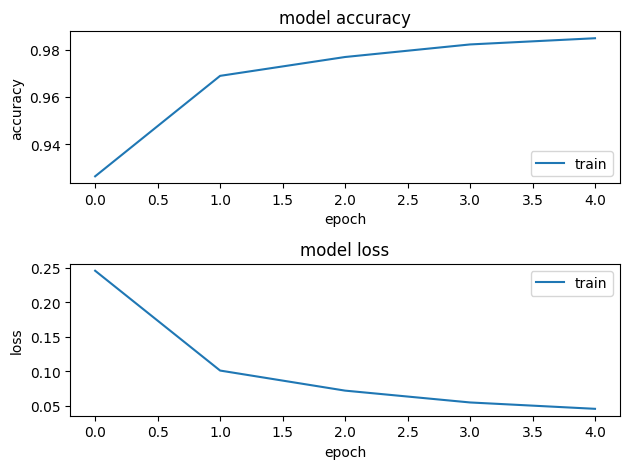

In [25]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()



---



Now let us introspect a few correctly and wrongly classified images to get a better understanding of where the model fails.

In [26]:
predicted_probs = model.predict(X_test)
predicted_classes = np.argmax(predicted_probs, axis=1)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 4ms/step


No of correct indices: (9784,)


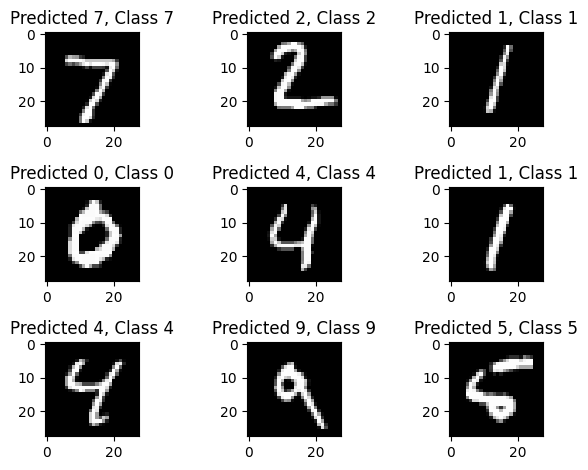

In [27]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()
print("No of correct indices:" ,correct_indices.shape)

No of incorrect indices: (216,)


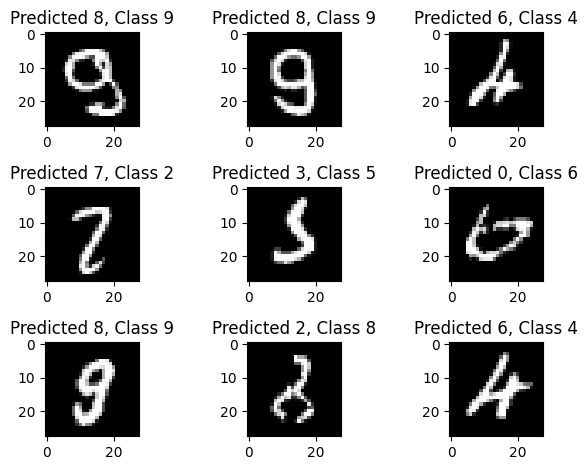

In [28]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()
print("No of incorrect indices:" ,incorrect_indices.shape)